# Deliverable 5

Press Shift-Enter to execute all code.

# Introduction

In this notebook we will fit a linear model to predict credit card balance based on 9 features. We will use ridge regression to fit this linear model, via both a manual implementation and an implementation using existing libraries.

First we import the relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next we read our dataset into a Pandas dataframe:

In [2]:
data=pd.read_csv('Credit_N400_p9.csv')

First we numerically encode our binary feature columns "Gender", "Student", and "Married":

In [3]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

Next we separate out our features for training from our response (ground truth) vector:

In [4]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

Next we standardize our features and center our response vector with the following function:

In [5]:
def standardize(data):
    data['Income']-=np.mean(data['Income'])
    data['Income']/=np.std(data['Income'])

    data['Limit']-=np.mean(data['Limit'])
    data['Limit']/=np.std(data['Limit'])

    data['Rating']-=np.mean(data['Rating'])
    data['Rating']/=np.std(data['Rating'])

    data['Cards']-=np.mean(data['Cards'])
    data['Cards']/=np.std(data['Cards'])

    data['Age']-=np.mean(data['Age'])
    data['Age']/=np.std(data['Age'])

    data['Education']-=np.mean(data['Education'])
    data['Education']/=np.std(data['Education'])

    data['Gender']-=np.mean(data['Gender'])
    data['Gender']/=np.std(data['Gender'])

    data['Student']-=np.mean(data['Student'])
    data['Student']/=np.std(data['Student'])

    data['Married']-=np.mean(data['Married'])
    data['Married']/=np.std(data['Married'])
    
    return data

In [6]:
X=standardize(X)

In [7]:
y-=np.mean(y)

Next we define our batch gradient descent function:


In [8]:
def gradient_descent(X, y, alpha, lamb, beta):    
    Xbeta=np.dot(X, beta)    
    y_minus_Xbeta=np.subtract(y, Xbeta)    
    X_T=np.transpose(X)    
    X_T_y_minus_Xbeta=np.dot(X_T, y_minus_Xbeta)    
    lambbeta=np.dot(lamb, beta)
    lambbeta_minus_XT_y_minus_Xbeta=np.subtract(lambbeta, X_T_y_minus_Xbeta)
    beta_update=np.dot((2*alpha), lambbeta_minus_XT_y_minus_Xbeta)
    beta=beta-beta_update
    return beta

# Deliverable 1

Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating a plot (e.g., using Excel, Matlab, R, etc.) of nine lines (one for each of the 𝑝=9 features), with the 𝑦-axis as $𝛽̂_{j}, 𝑗=1,2,…,9,$ and the 𝑥-axis the corresponding log-scaled tuning parameter value $log_{10}$(𝜆) that generated the particular $𝛽̂_{𝑗}$. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

To accomplish this, we perform gradient descent on our data with each of the following values of $𝜆∈{10^{−2},10^{−1},10^{0},10^{1},10^{2},10^{3},10^{4}}$:

In [9]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
beta_list=[]

for lamb in lambdas:
    beta=np.random.uniform(-1, 1, 9)    
    for i in range(1000):       
        beta_hat=gradient_descent(X, y, 10**-5, lamb, beta)
        beta=beta_hat
    beta_list.append(beta)    

Next we plot our results as requested:

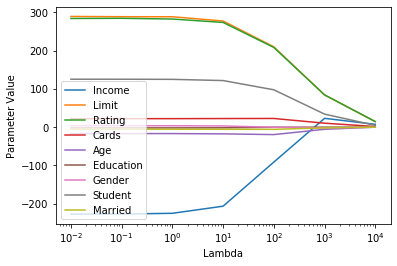

In [10]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

# Deliverable 2

Illustrate the effect of the tuning parameter on the cross validation error by generating a plot (e.g., using Excel, Matlab, R, etc.) with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

To accomplish this, we first reinitialize our data:

In [11]:
data=pd.read_csv('Credit_N400_p9.csv')

In [12]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

In [13]:
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

Then we define functions to help perform 5-fold cross validation:

In [15]:
def standardize_validation(train, val):
    val['Income']-=np.mean(train['Income'])
    val['Income']/=np.std(train['Income'])

    val['Limit']-=np.mean(train['Limit'])
    val['Limit']/=np.std(train['Limit'])

    val['Rating']-=np.mean(train['Rating'])
    val['Rating']/=np.std(train['Rating'])

    val['Cards']-=np.mean(train['Cards'])
    val['Cards']/=np.std(train['Cards'])

    val['Age']-=np.mean(train['Age'])
    val['Age']/=np.std(train['Age'])

    val['Education']-=np.mean(train['Education'])
    val['Education']/=np.std(train['Education'])

    val['Gender']-=np.mean(train['Gender'])
    val['Gender']/=np.std(train['Gender'])

    val['Student']-=np.mean(train['Student'])
    val['Student']/=np.std(train['Student'])

    val['Married']-=np.mean(train['Married'])
    val['Married']/=np.std(train['Married'])
    
    return val

In [16]:
def cross_validation_split(X, y, fold_no):    
    drop_train=np.arange(80*fold_no, 80*(fold_no+1))
    X_train=X.drop(axis=0, index=drop_train)
    y_train=y.drop(axis=0, index=drop_train)
    X_val=X.iloc[80*fold_no:80*(fold_no+1)]
    y_val=y.iloc[80*fold_no:80*(fold_no+1)]    
        
    X_val=standardize_validation(X_train, X_val)    
    y_val -= np.mean(y_train)
    
    X_train=standardize(X_train)
    y_train -= np.mean(y_train)    
        
    return X_train, y_train, X_val, y_val

Next we define functions to use the parameters from the 35 trained models to make predictions and compute MSE:

In [17]:
def predict(val, beta):
    predictions=np.dot(val, beta)
    return predictions

In [18]:
def compute_MSE(y_true, y_pred):
    error=(np.sum((y_true-y_pred)**2))/len(y_true)    
    return error

In [20]:
error_list=[]

for i in range(5):    
    X=data.drop(['Balance'], axis=1)
    y=data['Balance']
    X_train, y_train, X_val, y_val=cross_validation_split(X, y, i)    
    for lamb in lambdas:
        beta=np.random.uniform(-1, 1, 9)    
        for j in range(1000):       
            beta_hat=gradient_descent(X_train, y_train, 10**-5, lamb, beta)
            beta=beta_hat        
        predictions=predict(X_val, beta)
        error=compute_MSE(y_val, predictions)        
        error_list.append(error)

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Then we average error values across the 5 folds:

In [21]:
error_average_list=[]

error_average_list.append((error_list[0]+error_list[7]+error_list[14]+error_list[21]+error_list[28])/5)
error_average_list.append((error_list[1]+error_list[8]+error_list[15]+error_list[22]+error_list[29])/5)
error_average_list.append((error_list[2]+error_list[9]+error_list[16]+error_list[23]+error_list[30])/5)
error_average_list.append((error_list[3]+error_list[10]+error_list[17]+error_list[24]+error_list[31])/5)
error_average_list.append((error_list[4]+error_list[11]+error_list[18]+error_list[25]+error_list[32])/5)
error_average_list.append((error_list[5]+error_list[12]+error_list[19]+error_list[26]+error_list[33])/5)
error_average_list.append((error_list[6]+error_list[13]+error_list[20]+error_list[27]+error_list[34])/5)

And plot the results:

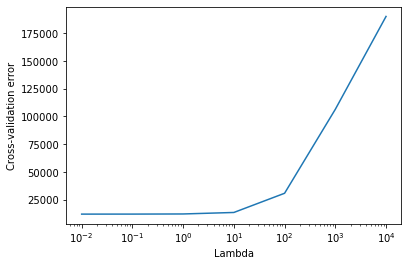

In [22]:
plt.plot(lambdas, error_average_list)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.show()

# Deliverable 3

Indicate the value of 𝜆 that generated the smallest CV(5) error.

It is evident from the plot above that the lambda value of $10^{-2}$ produced the smallest CV(5) error.

# Deliverable 4

Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=400 observations and provide the estimates of the 𝑝=9 best-fit model parameters.

In [23]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

In [24]:
X=standardize(X)
y-=np.mean(y)

In [25]:
lamb=10**-2
beta=np.random.uniform(-1, 1, 9)    
for i in range(1000):       
    beta_hat=gradient_descent(X, y, 10**-5, lamb, beta)
    beta=beta_hat
beta

array([-227.42965191,  289.76024036,  283.3880491 ,   22.09092314,
        -16.82048905,   -2.01654213,    3.67854998,  125.18083818,
         -5.47100218])

# Deliverable 6

Implement the assignment using statistical or machine learning libraries in a language of your choice. Compare the results with those obtained above, and provide a discussion as to why you believe your results are different if you found them to be different.

## Standardization

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error

In [27]:
data=pd.read_csv('Credit_N400_p9.csv')

In [28]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

In [29]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

In [30]:
standardize=StandardScaler()
y_center=StandardScaler(with_std=False)

In [31]:
X=standardize.fit_transform(X)
X=pd.DataFrame(X)

In [32]:
X.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']

In [33]:
y-=np.mean(y)

## Deliverable 1

Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating a plot (e.g., using Excel, Matlab, R, etc.) of nine lines (one for each of the 𝑝=9 features), with the 𝑦-axis as $𝛽̂_{j}, 𝑗=1,2,…,9,$ and the 𝑥-axis the corresponding log-scaled tuning parameter value $log_{10}$(𝜆) that generated the particular $𝛽̂_{𝑗}$. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

In [34]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
beta_list=[]

for lamb in lambdas:
    ridge=Ridge(alpha=lamb, max_iter=1000)
    ridge.fit(X, y)
    beta_list.append(ridge.coef_)

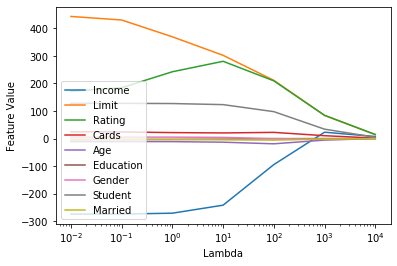

In [35]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Feature Value')
plt.legend(loc='lower left')
plt.show()

## Deliverable 2 

Illustrate the effect of the tuning parameter on the cross validation error by generating a plot (e.g., using Excel, Matlab, R, etc.) with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

In [36]:
ridge=Ridge(max_iter=1000)

parameters={'alpha': [1e-2, 1e-1, 1, 10, 100, 1000, 10000]}

mse=make_scorer(mean_squared_error, greater_is_better=False)

ridge_regressor=GridSearchCV(ridge, parameters, scoring=mse, cv=5, refit=False)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

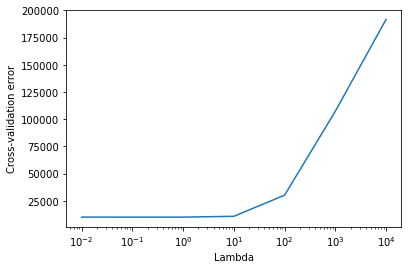

In [37]:
plt.plot(lambdas, np.absolute(ridge_regressor.cv_results_['mean_test_score']))
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.show()

## Deliverable 3

Indicate the value of 𝜆 that generated the smallest CV(5) error.

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-10080.822276681767


## Deliverable 4 

Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=400 observations and provide the estimates of the 𝑝=9 best-fit model parameters.

In [39]:
ridge=Ridge(alpha=1, max_iter=1000)
ridge.fit(X, y)
ridge.coef_

array([-271.23122766,  369.52441617,  242.60689635,   21.49206153,
        -11.27075014,   -3.04525924,    5.09410044,  127.07827162,
         -3.97552834])

# Discussion

There are a few notable differences between the manual implementation and the scikit-learn implementation. First, for Deliverable 1, the graphs are roughly similar, except for the shape 'Rating' feature. This could be due to the different ways in which scikit-learn performs ridge regression. 

I note here that sk-learn's built in ridge regression function has no parameter named 'lambda' or 'learning_rate' or 'lr'. In fact, what we call lambda in this assignment seems to be known as alpha in the sklearn function, and there is no way to tweak the learning rate at all.

Also, the scikit implementation returned a different ideal parameter value from the manual implementation. This is possibly due to the fact that given our large error values, scikit-learn may consider the differences in error when moving to smaller lambdas to be negligible enough that it chooses a simpler model with a higher lambda as the best tuning parameter.